In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
games = df.groupby(['game_name'])
for game in games:
    game_name = game[0]
    data = game[1][['load', 'level', 'it', 'GPU', 'CPU', 'storage']]
    data = data.groupby(['GPU', 'CPU', 'storage'])[['load', 'level', 'it']]
    plotGame(game_name, 'load', data)
    plotGame(game_name, 'level', data)

In [69]:
def plotGame(game_name, df):
    plt_n = 1
    plt.figure(figsize=(80, 20))
    logs_configs = df.groupby(['config'])

    for stat in df.columns:
        if stat == 'Time' or stat == 'idx' or stat == 'config' or stat == 'Unnamed: 0':
            continue;
        title = stat + ' over time for ' + game_name
        for config in logs_configs:
            plt.subplot(len(logs_configs), 2, plt_n)
            plt.plot(config[1]['idx'], config[1][stat], '-', label=config[0])
            plt.xlabel('Time (seconds)')
            plt.ylabel('Load %')
            plt.title(title)
            plt.legend()
            plt_n += 2
            if (plt_n == 9): plt_n = 2
            
    plt.savefig('Plot over time for ' + game_name + '.png')
    plt.show()

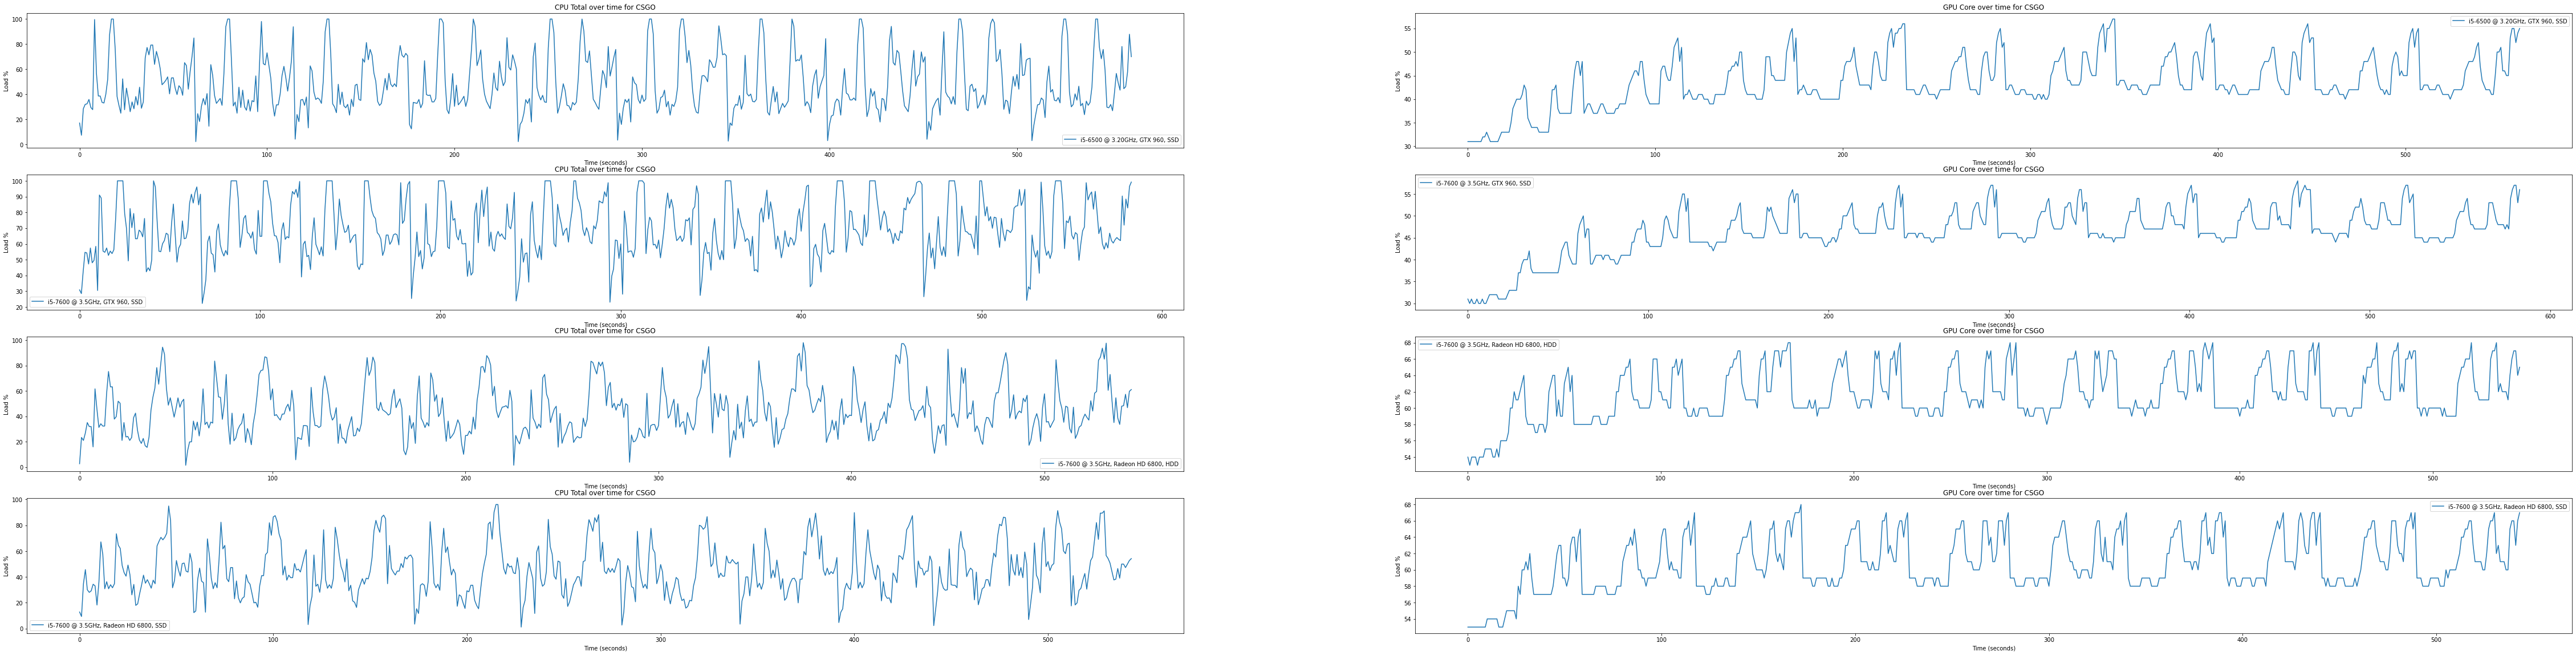

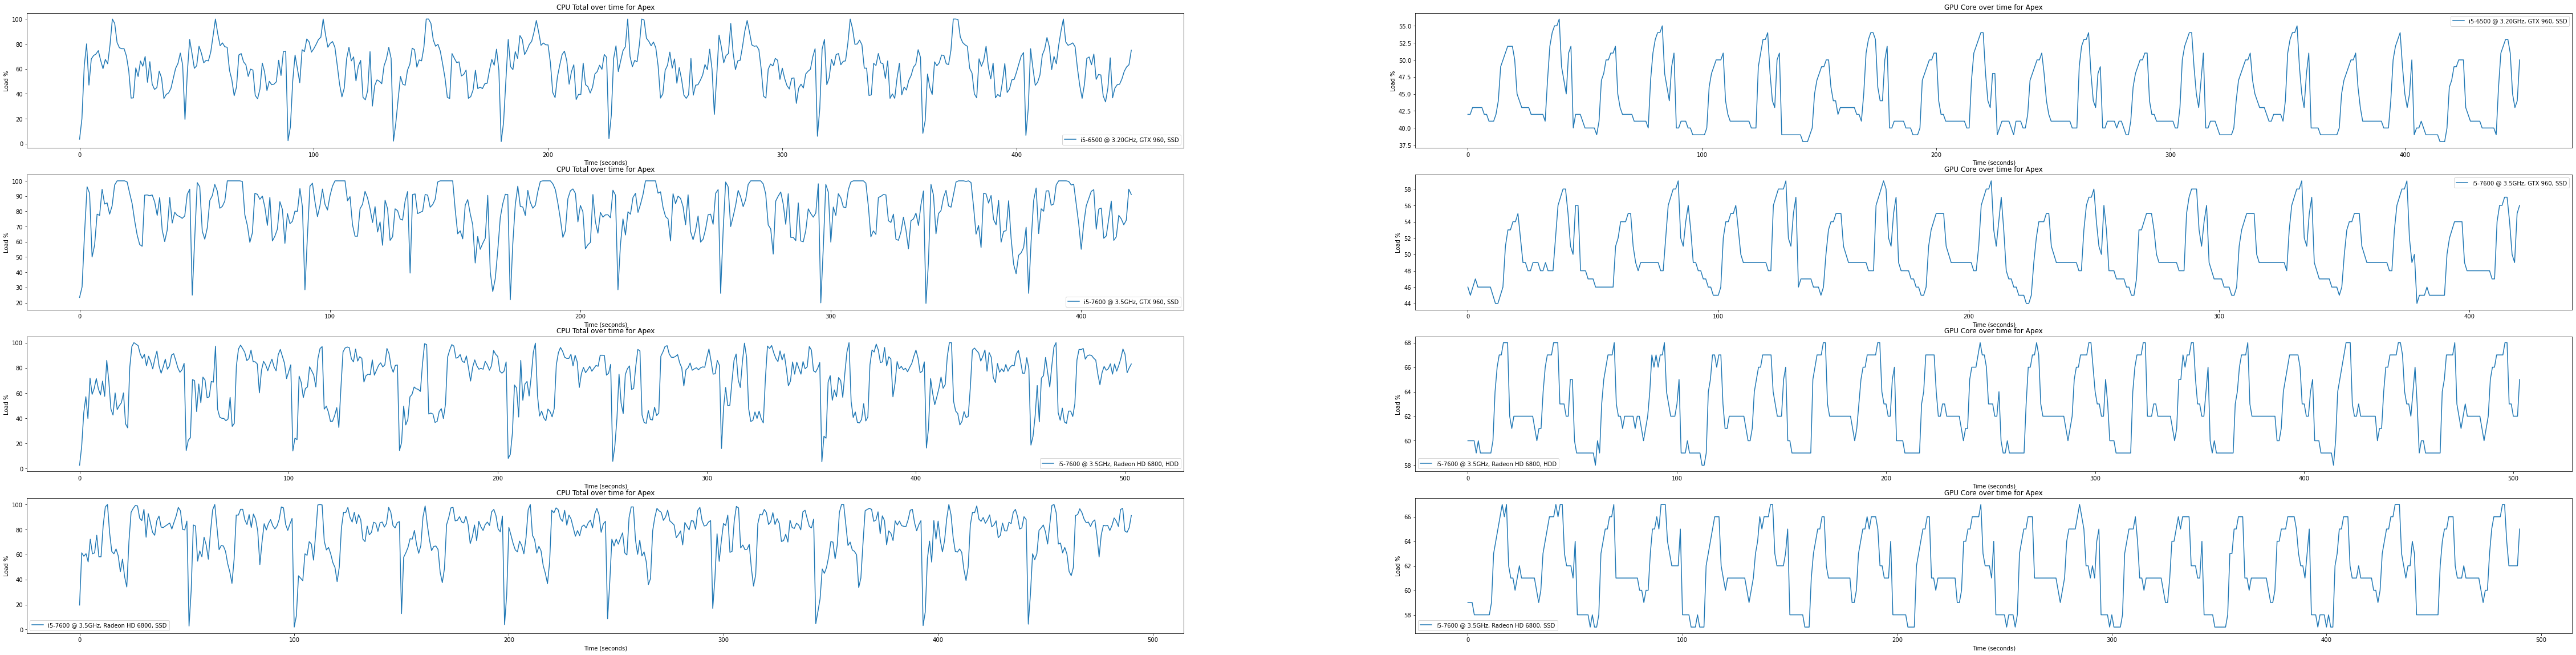

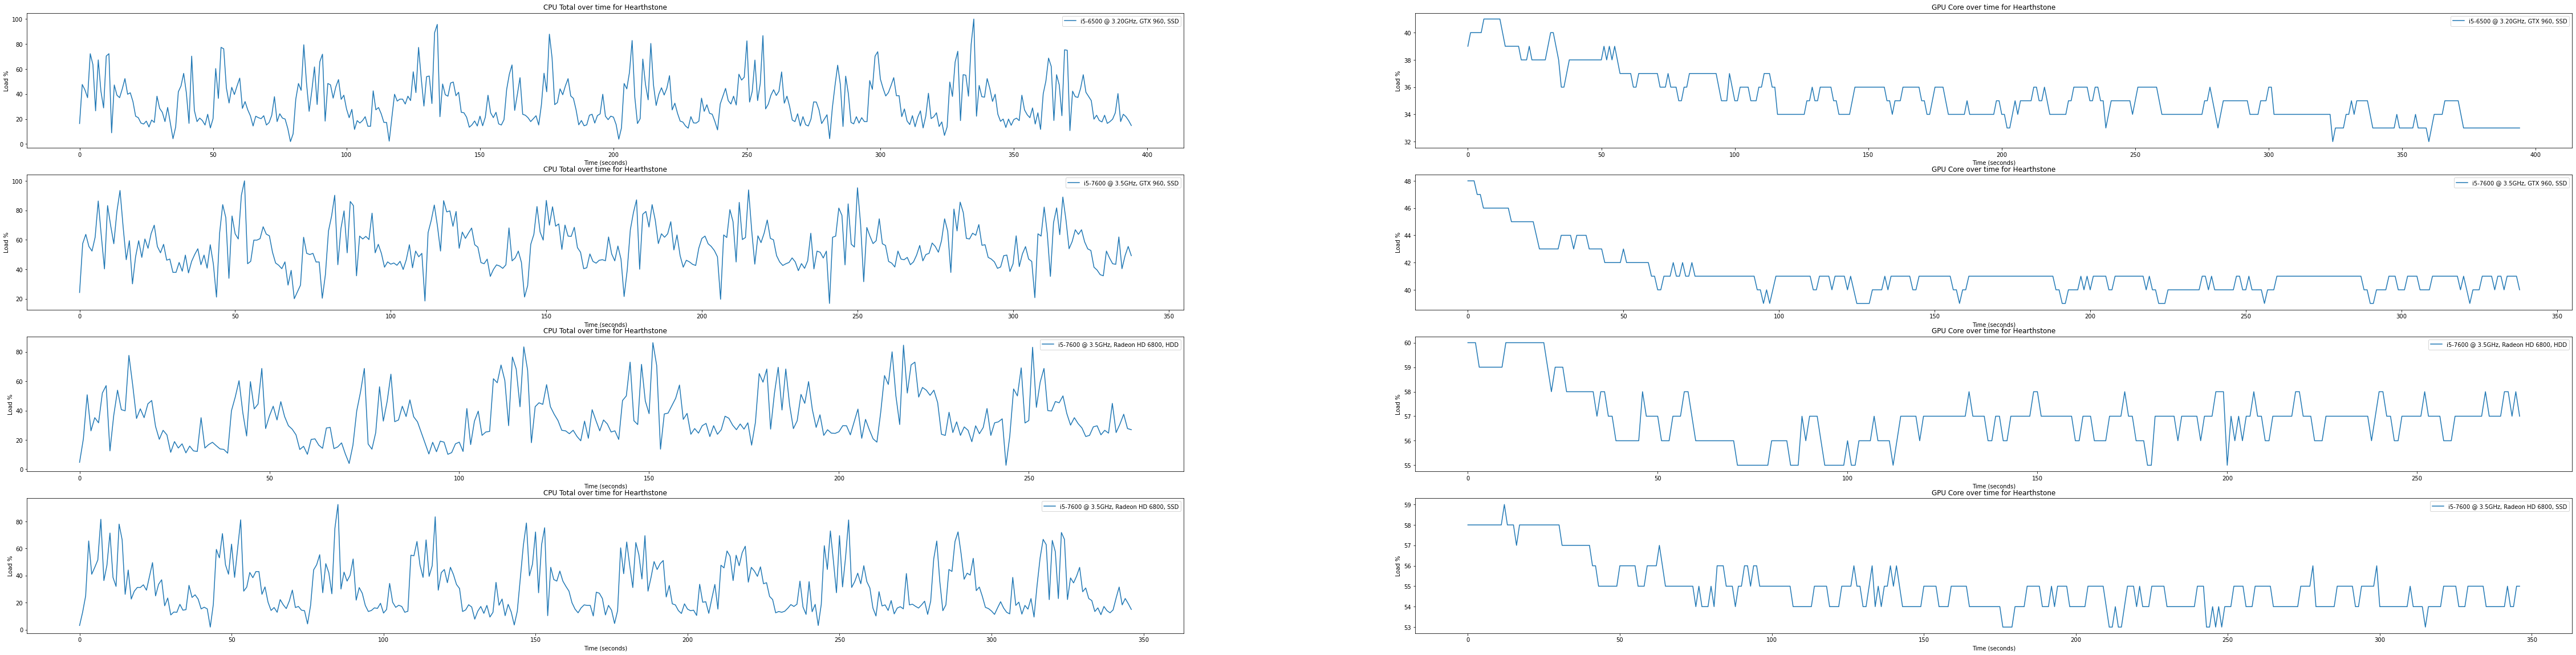

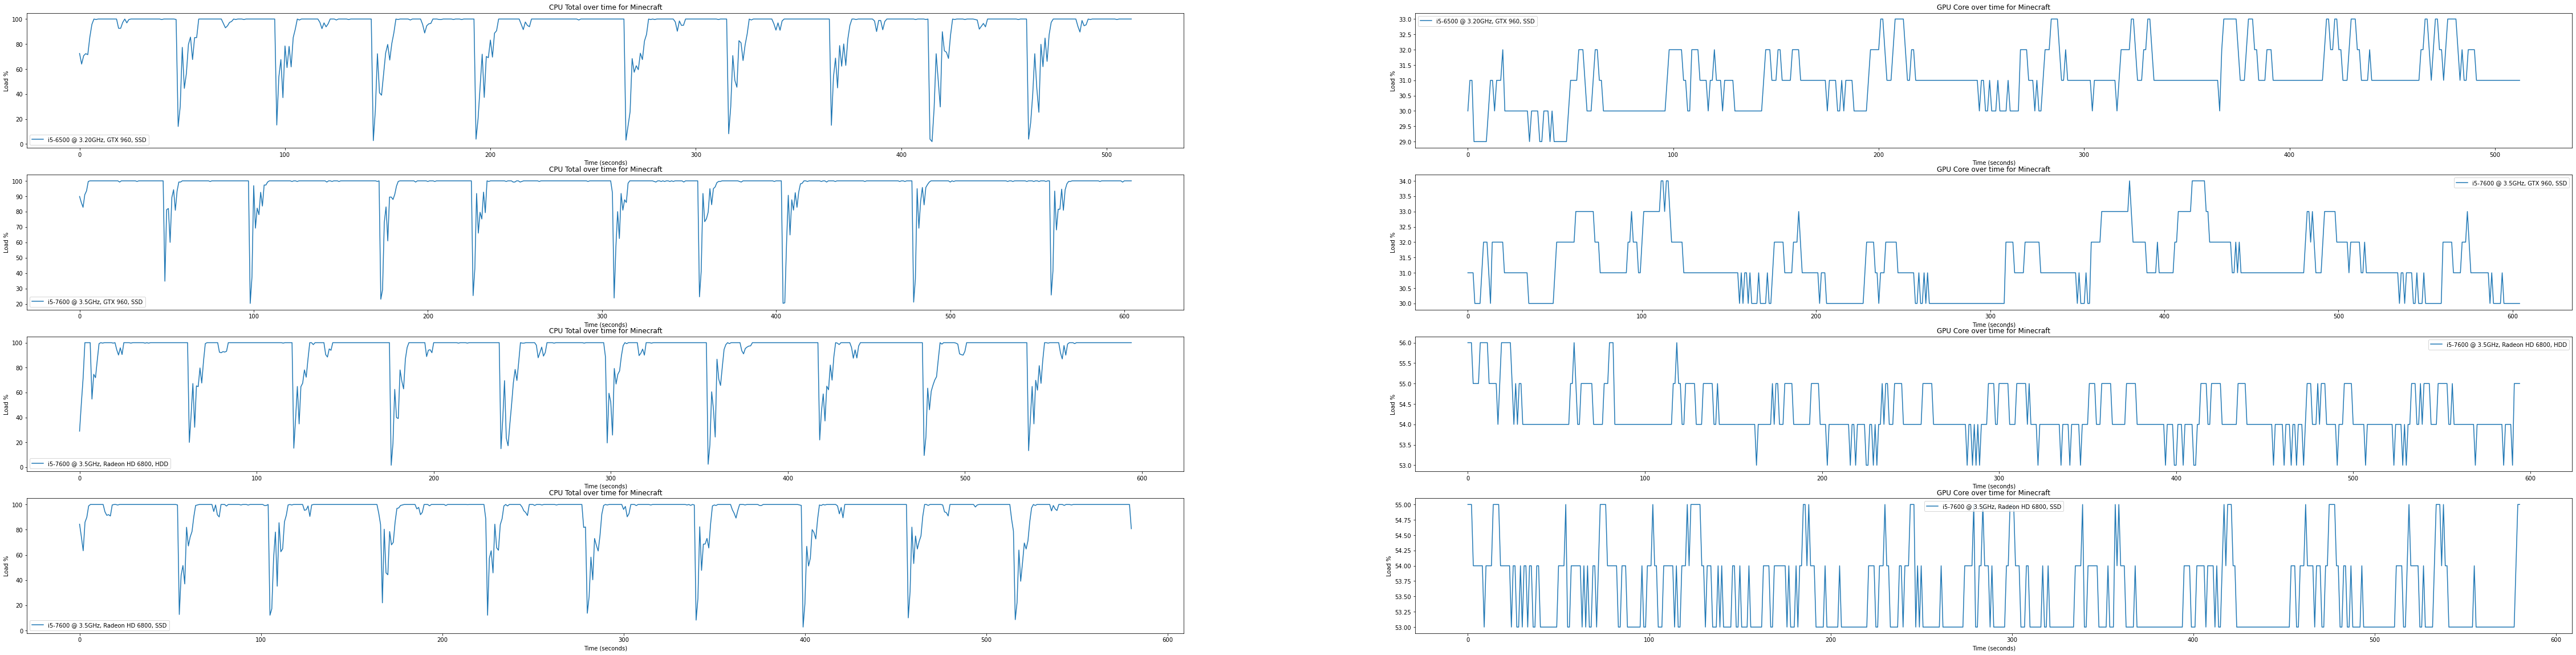

In [70]:
from glob import glob
import os

games = ['CSGO', 'Apex', 'Hearthstone', 'Minecraft']

for game in games:
    df = pd.DataFrame()
    for log in glob('../data/interim/hardware-data/main/hardware_logs/'+game + '_*.csv'):
        config = ', '.join(os.path.basename(log).split('_')[1:])
        config = config[0: len(config) - 4]
        config_df = pd.read_csv(log)
        config_df['config'] = config
        df = df.append(config_df, ignore_index=True)
    plotGame(game, df)